In [56]:
pip install igraph


     ---------------------------------------- 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install louvain


  Using cached louvain-0.7.1-cp39-cp39-win_amd64.whl (94 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [84]:
conda install h5py


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-06-06 01:13.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [3]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [4]:
import scanpy.external as sce

In [5]:
# file generated from script "22_Group_ABC_epithelial...""

adata_A= sc.read('Group_A_epithelial_immune.h5ad')
adata_B= sc.read('Group_B_epithelial_immune.h5ad')
adata_C= sc.read('Group_C_epithelial_immune.h5ad')


In [6]:
adata_A

AnnData object with n_obs × n_vars = 134836 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-2-0', 'pct_dropout_by_count

In [7]:
adata= adata_A.concatenate(adata_B, adata_C)
adata

AnnData object with n_obs × n_vars = 316153 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-2-0', 'pct_dropout_by_count

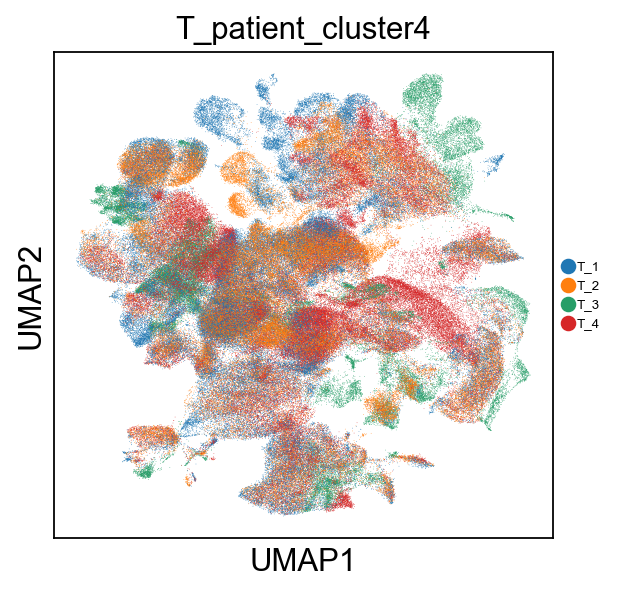

In [8]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'T_1': ['P010','P008','P021','P049','P020','P062','P032','P016','P061','P012',
                     'P057','P015','P065','P063','P130','P056', 'P011','P127','P126','P001',
                     'P028','P027','P030'],
             'T_2': ['P037','P031','P026','P042','P019','P017','P036','P054','P023','P128',
                     'P048','P002','P104','P087','P094','P084','P079','P107','P076','P089',
                     'P083'],
                     
                   
             'T_3': [ 'P986','P658','P836','P866','P846','P686','P865','P585','P944','P787'],
             'T_4': ['P052','P024','P040','P039','P080','P075','P091','P009B','P082','P022',
                     'P074','P047','P038','P044','P009A']
              }

# Initialize empty column in cell metadata
adata.obs['T_patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.patient).isin(cell_dict[i])
    adata.obs.loc[ind,'T_patient_cluster4'] = i

sc.pl.umap(adata, color=['T_patient_cluster4'], legend_loc='right margin', legend_fontsize=6, save='umap_all_cell_T_patient_cluster4.pdf')


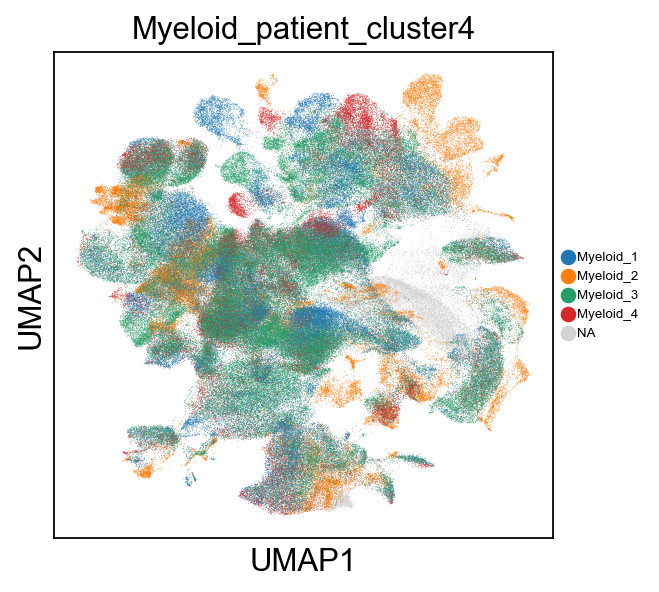

In [9]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'Myeloid_1': ['P063','P056','P009B','P075','P011','P032','P016','P104','P087','P089','P036','P083','P052',
                          'P047','P037','P091','P022','P074','P038','P082'],
            'Myeloid_2':  ['P130','P010','P986','P865','P585','P866','P846','P686','P658','P944','P836','P787'],
             'Myeloid_3': ['P040','P024','P017','P031','P026','P023','P049','P021','P107','P076','P079','P048','P062',
                          'P027','P065','P057','P008','P044','P001','P042','P094','P084','P080','P002','P061','P015'],
             'Myeloid_4': ['P128','P054','P019','P127','P126','P030','P028','P039','P020','P012']
              
              }

# Initialize empty column in cell metadata
adata.obs['Myeloid_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.patient).isin(cell_dict[i])
    adata.obs.loc[ind,'Myeloid_patient_cluster4'] = i

sc.pl.umap(adata, color=['Myeloid_patient_cluster4'], legend_loc='right margin', legend_fontsize=6, save='umap_all_cell_Myeloid_patient_cluster4.pdf')


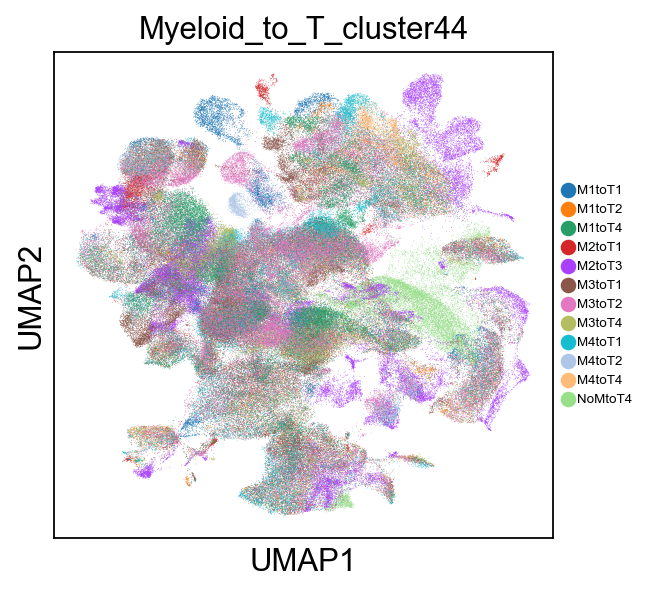

In [10]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",
],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",
],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",
],
             'M2toT1': ["P010",	"P130",
],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",
],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",
],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",
],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",
],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",
],
             'M4toT2': ["P019",	"P054",	"P128",
],
             'M4toT3': [],
             'M4toT4': ["P039",
],
             'NoMtoT4': ["P009A",
]
            }

# Initialize empty column in cell metadata
adata.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.patient).isin(cell_dict[i])
    adata.obs.loc[ind,'Myeloid_to_T_cluster44'] = i

sc.pl.umap(adata, color=['Myeloid_to_T_cluster44'], legend_loc='right margin', legend_fontsize=6, save='umap_allcell_Myeloid_to_T_cluster44.pdf')


In [11]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,GOBP_histone_score,GOBP_pi3k_score,celltype,crude,celltype_detail,dataset,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,T_patient_cluster
AAACCTGAGCTAAACA-1-0-0-0-0-0,2747.0,2630,1283.869751,19.201120,1.495566,tumor,P686,8,0,161.193115,...,-0.045633,0.042776,Fibroblast,Fibroblast,Fibroblast,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGAGCTGCAAG-1-0-0-0-0-0,696.0,664,821.045593,22.309502,2.717206,tumor,P686,16,0,97.282425,...,-0.034572,-0.058895,Tumor,Tumor,Tumor,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGAGTACGTAA-1-0-0-0-0-0,366.0,354,642.963806,39.510632,6.145079,tumor,P686,8,0,109.494339,...,0.036140,0.036661,Fibroblast,Fibroblast,Fibroblast,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGCACTGAAGG-1-0-0-0-0-0,720.0,699,956.075134,19.870264,2.078316,tumor,P686,33,0,186.630081,...,-0.050716,-0.010067,Tumor,Tumor,Tumor,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGGTGCACCAC-1-0-0-0-0-0,1406.0,1366,388.112122,6.067459,1.563326,tumor,P686,19,0,75.051537,...,-0.027467,-0.025247,Tumor,Tumor,Tumor,NaN,T_3,Myeloid_2,M2toT3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTTGGTGGA-1-23-1-1-2,1307.0,1269,1320.152710,30.058834,2.276921,tumor,P076,3,2,212.556946,...,NaN,NaN,3,B cell,B cell,Zhang dataset,T_2,Myeloid_3,M3toT2,NaN
TTTGGTTTCACCTTAT-1-23-1-1-2,1216.0,1192,1467.112671,23.589689,1.607899,tumor,P076,0,2,166.493027,...,NaN,NaN,0,T cell,CD4 T cell,Zhang dataset,T_2,Myeloid_3,M3toT2,NaN
TTTGGTTTCGCCGTGA-1-23-1-1-2,1420.0,1402,1545.445801,32.291584,2.089467,tumor,P076,1,2,171.050369,...,NaN,NaN,1,T cell,effector T cell,Zhang dataset,T_2,Myeloid_3,M3toT2,NaN
TTTGGTTTCTCGCATC-1-23-1-1-2,1511.0,1476,1507.028442,36.186527,2.401184,tumor,P076,2,2,188.171768,...,NaN,NaN,2,T cell,exhausted T cell,Zhang dataset,T_2,Myeloid_3,M3toT2,NaN


In [12]:
adata.obs['celltype_detail']

AAACCTGAGCTAAACA-1-0-0-0-0-0          Fibroblast
AAACCTGAGCTGCAAG-1-0-0-0-0-0               Tumor
AAACCTGAGTACGTAA-1-0-0-0-0-0          Fibroblast
AAACCTGCACTGAAGG-1-0-0-0-0-0               Tumor
AAACCTGGTGCACCAC-1-0-0-0-0-0               Tumor
                                      ...       
TTTGGTTGTTGGTGGA-1-23-1-1-2               B cell
TTTGGTTTCACCTTAT-1-23-1-1-2           CD4 T cell
TTTGGTTTCGCCGTGA-1-23-1-1-2      effector T cell
TTTGGTTTCTCGCATC-1-23-1-1-2     exhausted T cell
TTTGTCAAGTGTGAAT-1-23-1-1-2               B cell
Name: celltype_detail, Length: 316153, dtype: category
Categories (14, object): ['B cell', 'CD4 T cell', 'CD8 T cell', 'Fibroblast', ..., 'T cell', 'Tumor', 'effector T cell', 'exhausted T cell']

# check adata has tumor, fibro, and immn cells

In [13]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,GOBP_histone_score,GOBP_pi3k_score,celltype,crude,celltype_detail,dataset,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,T_patient_cluster
AAACCTGAGCTAAACA-1-0-0-0-0-0,2747.0,2630,1283.869751,19.201120,1.495566,tumor,P686,8,0,161.193115,...,-0.045633,0.042776,Fibroblast,Fibroblast,Fibroblast,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGAGCTGCAAG-1-0-0-0-0-0,696.0,664,821.045593,22.309502,2.717206,tumor,P686,16,0,97.282425,...,-0.034572,-0.058895,Tumor,Tumor,Tumor,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGAGTACGTAA-1-0-0-0-0-0,366.0,354,642.963806,39.510632,6.145079,tumor,P686,8,0,109.494339,...,0.036140,0.036661,Fibroblast,Fibroblast,Fibroblast,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGCACTGAAGG-1-0-0-0-0-0,720.0,699,956.075134,19.870264,2.078316,tumor,P686,33,0,186.630081,...,-0.050716,-0.010067,Tumor,Tumor,Tumor,NaN,T_3,Myeloid_2,M2toT3,NaN
AAACCTGGTGCACCAC-1-0-0-0-0-0,1406.0,1366,388.112122,6.067459,1.563326,tumor,P686,19,0,75.051537,...,-0.027467,-0.025247,Tumor,Tumor,Tumor,NaN,T_3,Myeloid_2,M2toT3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTTGGTGGA-1-23-1-1-2,1307.0,1269,1320.152710,30.058834,2.276921,tumor,P076,3,2,212.556946,...,NaN,NaN,3,B cell,B cell,Zhang dataset,T_2,Myeloid_3,M3toT2,NaN
TTTGGTTTCACCTTAT-1-23-1-1-2,1216.0,1192,1467.112671,23.589689,1.607899,tumor,P076,0,2,166.493027,...,NaN,NaN,0,T cell,CD4 T cell,Zhang dataset,T_2,Myeloid_3,M3toT2,NaN
TTTGGTTTCGCCGTGA-1-23-1-1-2,1420.0,1402,1545.445801,32.291584,2.089467,tumor,P076,1,2,171.050369,...,NaN,NaN,1,T cell,effector T cell,Zhang dataset,T_2,Myeloid_3,M3toT2,NaN
TTTGGTTTCTCGCATC-1-23-1-1-2,1511.0,1476,1507.028442,36.186527,2.401184,tumor,P076,2,2,188.171768,...,NaN,NaN,2,T cell,exhausted T cell,Zhang dataset,T_2,Myeloid_3,M3toT2,NaN


In [14]:
adata.obs['crude']

AAACCTGAGCTAAACA-1-0-0-0-0-0    Fibroblast
AAACCTGAGCTGCAAG-1-0-0-0-0-0         Tumor
AAACCTGAGTACGTAA-1-0-0-0-0-0    Fibroblast
AAACCTGCACTGAAGG-1-0-0-0-0-0         Tumor
AAACCTGGTGCACCAC-1-0-0-0-0-0         Tumor
                                   ...    
TTTGGTTGTTGGTGGA-1-23-1-1-2         B cell
TTTGGTTTCACCTTAT-1-23-1-1-2         T cell
TTTGGTTTCGCCGTGA-1-23-1-1-2         T cell
TTTGGTTTCTCGCATC-1-23-1-1-2         T cell
TTTGTCAAGTGTGAAT-1-23-1-1-2         B cell
Name: crude, Length: 316153, dtype: category
Categories (8, object): ['B cell', 'Fibroblast', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell', 'Tumor']

In [15]:
adata.obs.crude = adata.obs.crude.astype('category')
adata.obs.celltype = adata.obs.celltype.astype('category')
adata.obs.celltype_detail = adata.obs.celltype_detail.astype('category')
adata.obs.Myeloid_patient_cluster4 = adata.obs.Myeloid_patient_cluster4.astype('category')
adata.obs.T_patient_cluster4 = adata.obs.T_patient_cluster4.astype('category')
adata.obs.Myeloid_to_T_cluster44 = adata.obs.Myeloid_to_T_cluster44.astype('category')

In [16]:
adata.write('total_Epithelial_immune_cell_combined.h5ad')

In [17]:
adata = sc.read('total_Epithelial_immune_cell_combined.h5ad')

In [18]:
adata

AnnData object with n_obs × n_vars = 316153 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'T_patient_cluster'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-2-0', 

In [19]:
adata.obs['celltype_detail']

AAACCTGAGCTAAACA-1-0-0-0-0-0          Fibroblast
AAACCTGAGCTGCAAG-1-0-0-0-0-0               Tumor
AAACCTGAGTACGTAA-1-0-0-0-0-0          Fibroblast
AAACCTGCACTGAAGG-1-0-0-0-0-0               Tumor
AAACCTGGTGCACCAC-1-0-0-0-0-0               Tumor
                                      ...       
TTTGGTTGTTGGTGGA-1-23-1-1-2               B cell
TTTGGTTTCACCTTAT-1-23-1-1-2           CD4 T cell
TTTGGTTTCGCCGTGA-1-23-1-1-2      effector T cell
TTTGGTTTCTCGCATC-1-23-1-1-2     exhausted T cell
TTTGTCAAGTGTGAAT-1-23-1-1-2               B cell
Name: celltype_detail, Length: 316153, dtype: category
Categories (14, object): ['B cell', 'CD4 T cell', 'CD8 T cell', 'Fibroblast', ..., 'T cell', 'Tumor', 'effector T cell', 'exhausted T cell']

In [20]:
adata.obs['patient']

AAACCTGAGCTAAACA-1-0-0-0-0-0    P686
AAACCTGAGCTGCAAG-1-0-0-0-0-0    P686
AAACCTGAGTACGTAA-1-0-0-0-0-0    P686
AAACCTGCACTGAAGG-1-0-0-0-0-0    P686
AAACCTGGTGCACCAC-1-0-0-0-0-0    P686
                                ... 
TTTGGTTGTTGGTGGA-1-23-1-1-2     P076
TTTGGTTTCACCTTAT-1-23-1-1-2     P076
TTTGGTTTCGCCGTGA-1-23-1-1-2     P076
TTTGGTTTCTCGCATC-1-23-1-1-2     P076
TTTGTCAAGTGTGAAT-1-23-1-1-2     P076
Name: patient, Length: 316153, dtype: category
Categories (69, object): ['P001', 'P002', 'P008', 'P009A', ..., 'P865', 'P866', 'P944', 'P986']

In [21]:
df= pd.DataFrame(adata.obs)
df
df.to_csv('Group_ABC_after_celltype_clustering_Myel_Tcell_group_added.obs.csv')

In [22]:
P009A = adata[adata.obs['patient']=='P009A']
P036 = adata[adata.obs['patient']=='P036']
P126 = adata[adata.obs['patient']=='P126']
P038 = adata[adata.obs['patient']=='P038']
P104 = adata[adata.obs['patient']=='P104']
P082 = adata[adata.obs['patient']=='P082']
P063 = adata[adata.obs['patient']=='P063']
P056 = adata[adata.obs['patient']=='P056']
P866 = adata[adata.obs['patient']=='P866']
P686 = adata[adata.obs['patient']=='P686']
P658 = adata[adata.obs['patient']=='P658']
P787 = adata[adata.obs['patient']=='P787']
P986 = adata[adata.obs['patient']=='P986']
P585 = adata[adata.obs['patient']=='P585']
P944 = adata[adata.obs['patient']=='P944']
P836 = adata[adata.obs['patient']=='P836']
P087 = adata[adata.obs['patient']=='P087']
P047 = adata[adata.obs['patient']=='P047']
P040 = adata[adata.obs['patient']=='P040']
P044 = adata[adata.obs['patient']=='P044']
P022 = adata[adata.obs['patient']=='P022']

P048 = adata[adata.obs['patient']=='P048']
P039 = adata[adata.obs['patient']=='P039']
P127 = adata[adata.obs['patient']=='P127']
P054 = adata[adata.obs['patient']=='P054']
P016 = adata[adata.obs['patient']=='P016']
P002 = adata[adata.obs['patient']=='P002']
P128 = adata[adata.obs['patient']=='P128']
P031 = adata[adata.obs['patient']=='P031']
P026 = adata[adata.obs['patient']=='P026']
P012 = adata[adata.obs['patient']=='P012']
P027 = adata[adata.obs['patient']=='P027']
P079 = adata[adata.obs['patient']=='P079']
P076 = adata[adata.obs['patient']=='P076']
P052 = adata[adata.obs['patient']=='P052']
P028 = adata[adata.obs['patient']=='P028']
P080 = adata[adata.obs['patient']=='P080']
P062 = adata[adata.obs['patient']=='P062']
P846 = adata[adata.obs['patient']=='P846']
P107 = adata[adata.obs['patient']=='P107']
P089 = adata[adata.obs['patient']=='P089']
P083 = adata[adata.obs['patient']=='P083']
P074 = adata[adata.obs['patient']=='P074']

P130 = adata[adata.obs['patient']=='P130']
P010 = adata[adata.obs['patient']=='P010']
P030 = adata[adata.obs['patient']=='P030']
P015 = adata[adata.obs['patient']=='P015']
P049 = adata[adata.obs['patient']=='P049']
P037 = adata[adata.obs['patient']=='P037']
P032 = adata[adata.obs['patient']=='P032']
P075 = adata[adata.obs['patient']=='P075']
P009B = adata[adata.obs['patient']=='P009B']
P021 = adata[adata.obs['patient']=='P021']
P019 = adata[adata.obs['patient']=='P019']
P084 = adata[adata.obs['patient']=='P084']
P011 = adata[adata.obs['patient']=='P011']
P091 = adata[adata.obs['patient']=='P091']
P065 = adata[adata.obs['patient']=='P065']
P057 = adata[adata.obs['patient']=='P057']
P008 = adata[adata.obs['patient']=='P008']
P042 = adata[adata.obs['patient']=='P042']
P024 = adata[adata.obs['patient']=='P024']
P020 = adata[adata.obs['patient']=='P020']
P017 = adata[adata.obs['patient']=='P017']
P023 = adata[adata.obs['patient']=='P023']
P094 = adata[adata.obs['patient']=='P094']
P061 = adata[adata.obs['patient']=='P061']
P001 = adata[adata.obs['patient']=='P001']

In [23]:
P865 = adata[adata.obs['patient']=='P865']

In [24]:
P061

View of AnnData object with n_obs × n_vars = 4221 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'T_patient_cluster'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-

In [25]:
P009A.write('P009A_for_cellchat.h5ad', compression='gzip')
P036.write('P036_for_cellchat.h5ad', compression='gzip')
P126.write('P126_for_cellchat.h5ad', compression='gzip')
P038.write('P038_for_cellchat.h5ad', compression='gzip')
P104.write('P104_for_cellchat.h5ad', compression='gzip')
P082.write('P082_for_cellchat.h5ad', compression='gzip')
P063.write('P063_for_cellchat.h5ad', compression='gzip')
P056.write('P056_for_cellchat.h5ad', compression='gzip')
P866.write('P866_for_cellchat.h5ad', compression='gzip')
P686.write('P686_for_cellchat.h5ad', compression='gzip')
P658.write('P658_for_cellchat.h5ad', compression='gzip')
P787.write('P787_for_cellchat.h5ad', compression='gzip')
P986.write('P986_for_cellchat.h5ad', compression='gzip')
P585.write('P585_for_cellchat.h5ad', compression='gzip')
P944.write('P944_for_cellchat.h5ad', compression='gzip')

P836.write('P836_for_cellchat.h5ad', compression='gzip')
P087.write('P087_for_cellchat.h5ad', compression='gzip')
P047.write('P047_for_cellchat.h5ad', compression='gzip')
P040.write('P040_for_cellchat.h5ad', compression='gzip')
P044.write('P044_for_cellchat.h5ad', compression='gzip')
P022.write('P022_for_cellchat.h5ad', compression='gzip')

P048.write('P048_for_cellchat.h5ad', compression='gzip')
P039.write('P039_for_cellchat.h5ad', compression='gzip')
P127.write('P127_for_cellchat.h5ad', compression='gzip')
P054.write('P054_for_cellchat.h5ad', compression='gzip')
P016.write('P016_for_cellchat.h5ad', compression='gzip')
P002.write('P002_for_cellchat.h5ad', compression='gzip')
P128.write('P128_for_cellchat.h5ad', compression='gzip')
P031.write('P031_for_cellchat.h5ad', compression='gzip')
P026.write('P026_for_cellchat.h5ad', compression='gzip')
P012.write('P012_for_cellchat.h5ad', compression='gzip')
P027.write('P027_for_cellchat.h5ad', compression='gzip')
P079.write('P079_for_cellchat.h5ad', compression='gzip')
P076.write('P076_for_cellchat.h5ad', compression='gzip')
P052.write('P052_for_cellchat.h5ad', compression='gzip')
P028.write('P028_for_cellchat.h5ad', compression='gzip')
P080.write('P080_for_cellchat.h5ad', compression='gzip')
P062.write('P062_for_cellchat.h5ad', compression='gzip')
P846.write('P846_for_cellchat.h5ad', compression='gzip')


In [26]:
P865.write('P865_for_cellchat.h5ad', compression='gzip')
P107.write('P107_for_cellchat.h5ad', compression='gzip')
P089.write('P089_for_cellchat.h5ad', compression='gzip')
P083.write('P083_for_cellchat.h5ad', compression='gzip')
P074.write('P074_for_cellchat.h5ad', compression='gzip')


P130.write('P130_for_cellchat.h5ad', compression='gzip')
P010.write('P010_for_cellchat.h5ad', compression='gzip')
P030.write('P030_for_cellchat.h5ad', compression='gzip')
P015.write('P015_for_cellchat.h5ad', compression='gzip')
P049.write('P049_for_cellchat.h5ad', compression='gzip')
P037.write('P037_for_cellchat.h5ad', compression='gzip')
P032.write('P032_for_cellchat.h5ad', compression='gzip')
P075.write('P075_for_cellchat.h5ad', compression='gzip')
P009B.write('P009B_for_cellchat.h5ad', compression='gzip')
P021.write('P021_for_cellchat.h5ad', compression='gzip')
P019.write('P019_for_cellchat.h5ad', compression='gzip')
P084.write('P084_for_cellchat.h5ad', compression='gzip')
P011.write('P011_for_cellchat.h5ad', compression='gzip')
P091.write('P091_for_cellchat.h5ad', compression='gzip')
P065.write('P065_for_cellchat.h5ad', compression='gzip')
P057.write('P057_for_cellchat.h5ad', compression='gzip')
P008.write('P008_for_cellchat.h5ad', compression='gzip')
P042.write('P042_for_cellchat.h5ad', compression='gzip')
P024.write('P024_for_cellchat.h5ad', compression='gzip')
P020.write('P020_for_cellchat.h5ad', compression='gzip')
P017.write('P017_for_cellchat.h5ad', compression='gzip')
P023.write('P023_for_cellchat.h5ad', compression='gzip')
P094.write('P094_for_cellchat.h5ad', compression='gzip')
P061.write('P061_for_cellchat.h5ad', compression='gzip')
P001.write('P001_for_cellchat.h5ad', compression='gzip')

In [27]:
P009A.obs['crude']

AAACCTGAGATCCTGT-1-12-0-0-0-0     Tumor
AAACCTGAGCGTGTCC-1-12-0-0-0-0     Tumor
AAACCTGAGGTGCTTT-1-12-0-0-0-0     Tumor
AAACCTGAGTCCGGTC-1-12-0-0-0-0     Tumor
AAACCTGAGTTAGCGG-1-12-0-0-0-0     Tumor
                                  ...  
TTTGGTTGTTTGACAC-1-9-0-1-0       T cell
TTTGGTTGTTTGCATG-1-9-0-1-0       T cell
TTTGTCAAGCCAGTAG-1-9-0-1-0       T cell
TTTGTCAGTCTAAACC-1-9-0-1-0       T cell
TTTGTCATCAGGTTCA-1-9-0-1-0       T cell
Name: crude, Length: 16391, dtype: category
Categories (3, object): ['Fibroblast', 'T cell', 'Tumor']

In [28]:
adata_M1toT1 = adata[adata.obs['Myeloid_to_T_cluster44']=='M1toT1']
adata_M1toT2 = adata[adata.obs['Myeloid_to_T_cluster44']=='M1toT2']
adata_M1toT4 = adata[adata.obs['Myeloid_to_T_cluster44']=='M1toT4']

adata_M2toT1 = adata[adata.obs['Myeloid_to_T_cluster44']=='M2toT1']
adata_M2toT3 = adata[adata.obs['Myeloid_to_T_cluster44']=='M2toT3']

adata_M3toT1 = adata[adata.obs['Myeloid_to_T_cluster44']=='M3toT1']
adata_M3toT2 = adata[adata.obs['Myeloid_to_T_cluster44']=='M3toT2']
adata_M3toT4 = adata[adata.obs['Myeloid_to_T_cluster44']=='M3toT4']
          
adata_M4toT1 = adata[adata.obs['Myeloid_to_T_cluster44']=='M4toT1']
adata_M4toT2 = adata[adata.obs['Myeloid_to_T_cluster44']=='M4toT2']
adata_M4toT4 = adata[adata.obs['Myeloid_to_T_cluster44']=='M4toT4']

In [29]:
adata_NoMtoT4 = adata[adata.obs['Myeloid_to_T_cluster44']=='NoMtoT4']

In [30]:
adata_M1toT1.write('M1toT1_all_cells.h5ad', compression='gzip')
adata_M1toT2.write('M1toT2_all_cells.h5ad', compression='gzip')
adata_M1toT4.write('M1toT4_all_cells.h5ad', compression='gzip')

adata_M2toT1.write('M2toT1_all_cells.h5ad', compression='gzip')
adata_M2toT3.write('M2toT3_all_cells.h5ad', compression='gzip')

adata_M3toT1.write('M3toT1_all_cells.h5ad', compression='gzip')
adata_M3toT2.write('M3toT2_all_cells.h5ad', compression='gzip')
adata_M3toT4.write('M3toT4_all_cells.h5ad', compression='gzip')

adata_M4toT1.write('M4toT1_all_cells.h5ad', compression='gzip')
adata_M4toT2.write('M4toT2_all_cells.h5ad', compression='gzip')
adata_M4toT4.write('M4toT4_all_cells.h5ad', compression='gzip')

adata_NoMtoT4.write('NoMtoT4_all_cells.h5ad', compression='gzip')

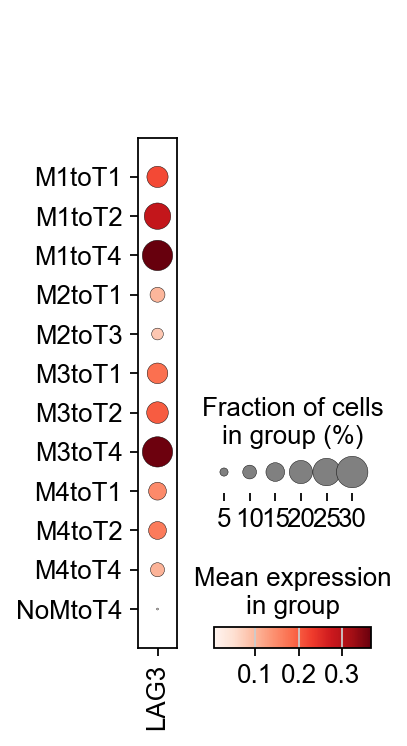

In [31]:
sc.pl.dotplot(adata,['LAG3'], groupby='Myeloid_to_T_cluster44')